I want to reduce dimensions from my dataset to improve clustering. Here I try dimension reduction with PCA.
Also see the following link to make a scree plot with PCA.
This link is useful: https://www.analyticsvidhya.com/blog/2016/03/practical-guide-principal-component-analysis-python/

"Finally, explicitly cast the DataFrame into a numpy array which can be used  by the scikit-learn API. Note that at this point you lose your feature labels (Headers), so it would be difficult to keep track of the features if you use the "feature-importance" routine in scikit-learn. I have the practice of saving the headers before casting the data-frame into a numpy array. [>>list(<DataFrame>) prints out the headers into a nice list]"

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn.preprocessing import scale

Read in a well of unnormalized data as a numpy array

In [3]:
# Read data directly in as a numpy array. Not in use, it can't handle headers or columns of different type
#my_data = np.genfromtxt(
#    '/Users/tswenson/Documents/Joels/Health_Data_Science/COMPANY_consulting_project/datasets/merged_csvs/LABELLED_by_cell_type_screen_525_cell_plate_1_well_i12.csv',
#    delimiter=','); # This might not work because of the metadata, 
## maybe import as pandas df then subset to a numpy array, then label with the metadata

In [4]:
#type(my_data)

numpy.ndarray

In [7]:
# Make sure that they data is read in properly!!!!!!!!, check types and classes of columns, etc
#my_data[[0,1,-2,-1]]

array([[             nan,              nan,              nan,
                     nan,              nan,              nan,
                     nan,              nan,              nan,
                     nan,              nan,              nan,
                     nan,              nan,              nan,
                     nan,              nan,              nan,
                     nan,              nan,              nan,
                     nan,              nan,              nan,
                     nan,              nan,              nan,
                     nan,              nan,              nan,
                     nan,              nan,              nan,
                     nan,              nan,              nan,
                     nan,              nan],
       [  0.00000000e+00,   5.20148000e+05,   7.66000000e+03,
          5.49105000e+05,   7.81400000e+03,   1.94881900e+06,
          1.44850000e+04,  -5.47752000e+05,   3.43100000e+03,
         -5.16340000e+04,

Read data in as a Pandas dataframe

In [9]:
filename = '/Users/tswenson/Documents/Joels/Health_Data_Science/COMPANY_consulting_project/datasets/merged_csvs/LABELLED_by_cell_type_screen_525_cell_plate_1_well_i12.csv'

In [12]:
my_data=pd.read_csv(filename, index_col=0)

In [13]:
my_data.head()

,7AAD A,7AAD H,BL3-A,BL3-H,BL5-A,BL5-H,CD14 A : PE A,CD14 H : PE H,CD16 A : APC A,CD16 H : APC H,...,VL5-A,VL5-H,VL6-A,VL6-H,Width,cell_label,cell_plate,lineage,screen,well
0,520148.0,7660.0,549105.0,7814.0,1948819.0,14485.0,-547752.0,3431.0,-51634.0,5530.0,...,216836.0,12236.0,930071.0,9105.0,5267.0,unlabelled,cell_plate_1,parent,screen_525,well_i12
1,-1712.0,190.0,-1935.0,1399.0,53.0,2166.0,266.0,520.0,2421.0,2585.0,...,2102.0,2147.0,-976.0,4555.0,38.0,unlabelled,cell_plate_1,parent,screen_525,well_i12
2,-2855.0,-218.0,-1438.0,1320.0,-160.0,2857.0,-116.0,177.0,399.0,1867.0,...,1119.0,1955.0,2785.0,4761.0,43.0,unlabelled,cell_plate_1,parent,screen_525,well_i12
3,359.0,996.0,-671.0,1263.0,6736.0,4760.0,-245.0,-254.0,2587.0,1871.0,...,2100.0,1399.0,5710.0,4403.0,47.0,unlabelled,cell_plate_1,parent,screen_525,well_i12
4,20928.0,6786.0,61841.0,17053.0,973.0,5018.0,11227.0,3493.0,6390.0,2052.0,...,30694.0,21224.0,21667.0,7744.0,190.0,unlabelled,cell_plate_1,parent,screen_525,well_i12


In [14]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7979 entries, 0 to 7978
Data columns (total 37 columns):
7AAD A                               7979 non-null float64
7AAD H                               7979 non-null float64
BL3-A                                7979 non-null float64
BL3-H                                7979 non-null float64
BL5-A                                7979 non-null float64
BL5-H                                7979 non-null float64
CD14 A : PE A                        7979 non-null float64
CD14 H : PE H                        7979 non-null float64
CD16 A : APC A                       7979 non-null float64
CD16 H : APC H                       7979 non-null float64
CD34 A : BV605 A                     7979 non-null float64
CD34 H : BV605 H                     7979 non-null float64
CD66B A : CD19 A : CD3 A : FITC A    7979 non-null float64
CD66B H : CD19 H : CD3 H : FITC H    7979 non-null float64
FSC-A                                7979 non-null float64
FSC-H   

In [16]:
my_data_headers = list(my_data)

In [81]:
meta_headers = ["Width","cell_label","cell_plate","lineage","screen","well","Time"]

In [82]:
my_data_data_headers = [x for x in my_data_headers if not x in meta_headers]

In [83]:
my_data_data_headers

['7AAD A',
 '7AAD H',
 'BL3-A',
 'BL3-H',
 'BL5-A',
 'BL5-H',
 'CD14 A : PE A',
 'CD14 H : PE H',
 'CD16 A : APC A',
 'CD16 H : APC H',
 'CD34 A : BV605 A',
 'CD34 H : BV605 H',
 'CD66B A : CD19 A : CD3 A : FITC A',
 'CD66B H : CD19 H : CD3 H : FITC H',
 'FSC-A',
 'FSC-H',
 'KIT A : BV421 A',
 'KIT H : BV421 H',
 'RL2-A',
 'RL2-H',
 'SSC-A',
 'SSC-H',
 'VL2-A',
 'VL2-H',
 'VL3-A',
 'VL3-H',
 'VL5-A',
 'VL5-H',
 'VL6-A',
 'VL6-H']

In [22]:
%matplotlib notebook

In [25]:
my_data[my_data_data_headers].head(n=2)

,7AAD A,7AAD H,BL3-A,BL3-H,BL5-A,BL5-H,CD14 A : PE A,CD14 H : PE H,CD16 A : APC A,CD16 H : APC H,...,SSC-A,SSC-H,VL2-A,VL2-H,VL3-A,VL3-H,VL5-A,VL5-H,VL6-A,VL6-H
0,520148.0,7660.0,549105.0,7814.0,1948819.0,14485.0,-547752.0,3431.0,-51634.0,5530.0,...,16777215.0,16760232.0,311709.0,25019.0,-45753.0,8486.0,216836.0,12236.0,930071.0,9105.0
1,-1712.0,190.0,-1935.0,1399.0,53.0,2166.0,266.0,520.0,2421.0,2585.0,...,609625.0,914585.0,79.0,822.0,62.0,1630.0,2102.0,2147.0,-976.0,4555.0


In [63]:
# scale the data
my_scaled_data = scale(my_data[my_data_data_headers])

In [64]:
my_scaled_data.dtype

dtype('float64')

In [65]:
my_scaled_data[[0,1,-2,-1]]

array([[  2.25974827e+00,  -2.03151467e-01,   1.05967672e+00,
         -2.20940148e-01,   5.00831163e+01,   2.93093386e+00,
         -1.11286094e+00,  -2.77458980e-01,  -1.78887261e+00,
         -2.59048011e-01,   4.10405499e-01,   1.63961777e-01,
         -2.21523855e-02,  -3.33207213e-01,   1.44101511e+01,
          7.83445468e+00,   2.26086463e-01,   9.14736194e-01,
          5.70997048e+01,   9.22752678e+00,   1.50774870e+01,
          1.30089643e+01,   2.79190734e-01,  -1.19662480e-01,
         -1.65249336e-01,  -1.09613193e-01,   3.74459057e-01,
         -6.01550124e-02,   1.82142024e+01,   2.54275011e+00],
       [ -1.31224161e-01,  -4.26047226e-01,  -9.24762864e-02,
         -4.87283394e-01,  -1.03296423e-01,  -8.00560061e-02,
         -7.97600738e-02,  -3.90774040e-01,  -7.21586324e-02,
         -8.30291364e-01,  -1.19885200e-01,  -3.54988878e-01,
         -1.48982856e-01,  -3.64117954e-01,  -2.66441603e-01,
         -5.30655104e-01,  -7.57474032e-02,  -2.79224396e-01,
       

In [66]:
# Perform PCA
pca = decomposition.PCA()
pca.fit(my_scaled_data)

PCA(copy=True, n_components=None, whiten=False)

In [67]:
#The amount of variance that each PC explains
var=pca.explained_variance_ratio_

<IPython.core.display.Javascript object>


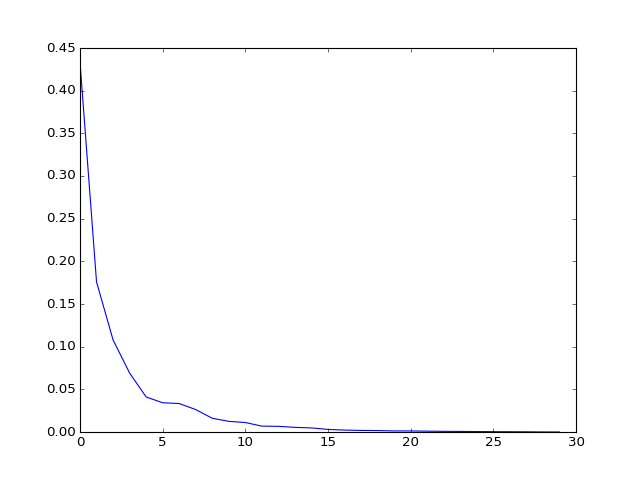

In [73]:
plt.plot(var)

In [69]:
#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

In [70]:
print(var1)

[ 43.35  60.94  71.73  78.64  82.75  86.18  89.52  92.15  93.76  95.01
  96.12  96.81  97.47  98.01  98.49  98.79  99.01  99.19  99.36  99.48
  99.6   99.7   99.78  99.85  99.9   99.94  99.97  99.99 100.   100.  ]


<IPython.core.display.Javascript object>


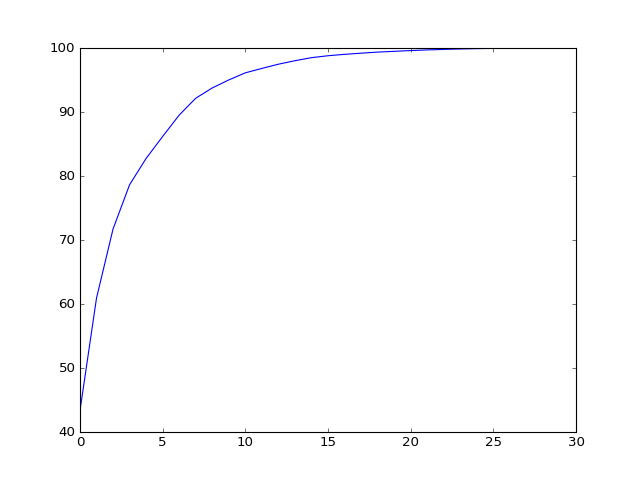

In [71]:
plt.plot(var1)

In [52]:
print("Based on the above for /Users/tswenson/Documents/Joels/Health_Data_Science/COMPANY_consulting_project/datasets/merged_csvs/LABELLED_by_cell_type_screen_525_cell_plate_1_well_i12.csv I will use the first 5 components...this could and showld be done programmatically...say the number of components that explains 90% of the variance")

Based on the above for /Users/tswenson/Documents/Joels/Health_Data_Science/COMPANY_consulting_project/datasets/merged_csvs/LABELLED_by_cell_type_screen_525_cell_plate_1_well_i12.csv I will use the first 5 components...this could and showld be done programmatically...say the number of components that explains 90% of the variance


In [72]:
print("Scaling seems to be very important")

Scaling seems to be very important


### Transform my data based on the PCA results 

In [74]:
pca = decomposition.PCA(n_components = 5)

In [75]:
pca.fit(my_scaled_data)

PCA(copy=True, n_components=5, whiten=False)

In [76]:
my_scaled_data_transformed = pca.fit_transform(my_scaled_data)

In [78]:
type(my_scaled_data_transformed)

numpy.ndarray

In [79]:
my_scaled_data_transformed.shape

(7979, 5)

In [84]:
my_scaled_data_transformed[[0,1,-2,-1]]

array([[-22.78796611,  -7.36276005, -62.6207719 ,   2.25695424,
        -37.13226466],
       [  0.91762623,   0.48693666,  -0.40587862,  -0.17872314,
         -0.13690369],
       [-45.245984  , -25.44974329,  19.24829985, -11.08554345,
         -4.55729089],
       [ -1.31080809,  -0.97697894,   0.43040459,  -1.34811754,
          1.10976257]])

In [80]:
my_data[my_data_data_headers].shape

(7979, 30)

#### Convert transformed data into a pandas dataframe and then combine it with the meta data 

In [89]:
# Check that the row order isn't affected
pd.DataFrame(my_scaled_data_transformed[[0,1,-2,-1]])

,0,1,2,3,4
0,-22.787966,-7.362760,-62.620772,2.256954,-37.132265
1,0.917626,0.486937,-0.405879,-0.178723,-0.136904
2,-45.245984,-25.449743,19.248300,-11.085543,-4.557291
3,-1.310808,-0.976979,0.430405,-1.348118,1.109763


In [91]:
my_scaled_data_transformed_pd = pd.DataFrame(my_scaled_data_transformed)

In [92]:
my_scaled_data_transformed_pd.shape

(7979, 5)

In [96]:
my_scaled_data_transformed_pd_meta = pd.concat([my_scaled_data_transformed_pd, my_data[meta_headers]], axis=1);
# Note that the above line works because they have the same index, if they didn't and I 
## wanted to perform a cbind, I could say my_scaled_data_transformed_pd.reset_index(drop=True)

In [97]:
my_scaled_data_transformed_pd_meta.shape

(7979, 12)

In [101]:
print(my_data[meta_headers].head(n=2))
print("NEXT------------------------")
print(my_scaled_data_transformed_pd.head(n=2))
print("NEXT------------------------")
print(my_scaled_data_transformed_pd_meta.head(n=2))

    Width  cell_label    cell_plate lineage      screen      well      Time
0  5267.0  unlabelled  cell_plate_1  parent  screen_525  well_i12  339704.0
1    38.0  unlabelled  cell_plate_1  parent  screen_525  well_i12  339704.0
NEXT------------------------
           0         1          2         3          4
0 -22.787966 -7.362760 -62.620772  2.256954 -37.132265
1   0.917626  0.486937  -0.405879 -0.178723  -0.136904
NEXT------------------------
           0         1          2         3          4   Width  cell_label  \
0 -22.787966 -7.362760 -62.620772  2.256954 -37.132265  5267.0  unlabelled   
1   0.917626  0.486937  -0.405879 -0.178723  -0.136904    38.0  unlabelled   

     cell_plate lineage      screen      well      Time  
0  cell_plate_1  parent  screen_525  well_i12  339704.0  
1  cell_plate_1  parent  screen_525  well_i12  339704.0  


In [106]:
filename_out = filename.split(".csv")[0] + "_PCAd.csv"

In [108]:
my_scaled_data_transformed_pd_meta.to_csv(filename_out)